In [1]:
import pandas as pd

# https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/page/ppr-home-en

In [2]:
df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")
df = df.sample(50000)
df = df.reset_index()

C:\Users\santi\AppData\Local\Temp\ipykernel_1876\1811125323.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")


In [3]:
df.head()

,index,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,572753,28/11/2022,"18 SILVERLAWNS, NAVAN, MEATH",Meath,C15YY90,"265,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,346168,13/12/2018,"34 BURKEEN HALL, WICKLOW TOWN, CO. WICKLOW",Wicklow,NaN,"334,802.00",No,Yes,New Dwelling house /Apartment,NaN
2,483895,28/06/2021,"7 MILLRACE CRESCENT, DRUMROOSKE, DONEGAL TOWN",Donegal,F94P5P0,"137,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,17528,05/11/2010,"44 Paddocks View, Adamstown",Dublin,NaN,"226,872.24",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
4,213107,28/07/2016,"17 CASTLE MEADOWS, SKEHARD RD, BLACKROCK",Cork,NaN,"252,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [4]:
df.shape

(50000, 10)

In [5]:
df.isna().sum()


index                            0
Date of Sale (dd/mm/yyyy)        0
Address                          0
County                           0
Eircode                      42307
Price ()                        0
Not Full Market Price            0
VAT Exclusive                    0
Description of Property          0
Property Size Description    45631
dtype: int64

In [6]:
df.columns

Index(['index', 'Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode',
       'Price ()', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [7]:
df['Price'] = df['Price ()']
df['Price'] = df['Price'].str[1:]
df['Price'] = df['Price'].str.replace(',', '')
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

C:\Users\santi\AppData\Local\Temp\ipykernel_1876\2904156962.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('\d+', '')


dropped eircode explain why

In [8]:
df = df[['Address', 'County','Price','Description of Property']]

In [9]:
df['Price'] = df['Price'].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  50000 non-null  object 
 1   County                   50000 non-null  object 
 2   Price                    50000 non-null  float64
 3   Description of Property  50000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [11]:
df.County.unique()

array(['Meath', 'Wicklow', 'Donegal', 'Dublin', 'Cork', 'Kerry', 'Louth',
       'Cavan', 'Tipperary', 'Kildare', 'Leitrim', 'Monaghan', 'Laois',
       'Galway', 'Waterford', 'Clare', 'Sligo', 'Limerick', 'Mayo',
       'Carlow', 'Roscommon', 'Wexford', 'Westmeath', 'Offaly',
       'Kilkenny', 'Longford'], dtype=object)

Data transformation address

In [12]:
df['Address'].sample(20)

10136        SEAGREEN AVENUE BLACKLION GREYSTONES
23509       ARDILAUN COURT SYBIL HILL ROAD RAHENY
19548               CASTLETIMON PARK KILMORE WEST
26303         SEAPOINT AVENUE MONKSTOWN CO DUBLIN
29577       CEOL NA MARA LARTIGUE RD BALLYBUNNION
23077           SEA HAVEN TRAFALGAR RD GREYSTONES
47867             HAZEL GLEN HAZEL BROOK SPA GLEN
44042            PHILISBURGH AVE FAIRVIEW DUBLIN 
24709          ST MARTIN COOGUE NORTH BALLYHAUNIS
29788             B SEXTON ST ABBEYSIDE DUNGARVAN
23775       BURFORD DRIVE HONEYPARK DUN LAOGHAIRE
26580           SUMMERHILL NORTH ST LUKE&#;S CORK
34750                    ASHBROOK ORANMORE GALWAY
19308          THE LAWN CLOVER MEADOWS ABBEYLANDS
29817     ST JUDES PARK ST PATRICKS ROAD LIMERICK
16968      ORANMORE RD BALLYFERMOT DUBLIN  DUBLIN
35925               STONELEIGH CRADDOCKSTOWN NAAS
34109                   CLOS EMER SALTOWN DUNDALK
44229                   THE LAURELS DUNDALK LOUTH
26866       A MOUNT SION ROAD GREENMOUNT CO. CORK


In [13]:
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

C:\Users\santi\AppData\Local\Temp\ipykernel_1876\316044791.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('\d+', '')


In [14]:
df['Address'].sample(4)

40565           APT  STRAND VIEW HOWTH ROAD DUBLIN 
33194                       DOOLARGY AVENUE DUNDALK
49632     SPRINGFIELD CLOSE MULLINGAR CO. WESTMEATH
41391                 ST MARYS RD EAST WALL DUBLIN 
Name: Address, dtype: object

In [15]:
df.head()

,Address,County,Price,Description of Property
0,SILVERLAWNS NAVAN MEATH,Meath,265000.00,Second-Hand Dwelling house /Apartment
1,BURKEEN HALL WICKLOW TOWN CO. WICKLOW,Wicklow,334802.00,New Dwelling house /Apartment
2,MILLRACE CRESCENT DRUMROOSKE DONEGAL TOWN,Donegal,137500.00,Second-Hand Dwelling house /Apartment
3,PADDOCKS VIEW ADAMSTOWN,Dublin,226872.24,New Dwelling house /Apartment
4,CASTLE MEADOWS SKEHARD RD BLACKROCK,Cork,252000.00,Second-Hand Dwelling house /Apartment


In [16]:
df['Description of Property'] = df['Description of Property'].str.replace('Second-Hand Dwelling house /Apartment', 'Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('New Dwelling house /Apartment', 'New')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Atháimhe','Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Nua','New')
df = df[df['Description of Property'] != 'Teach/?ras?n C?naithe Nua']
df = df.dropna()

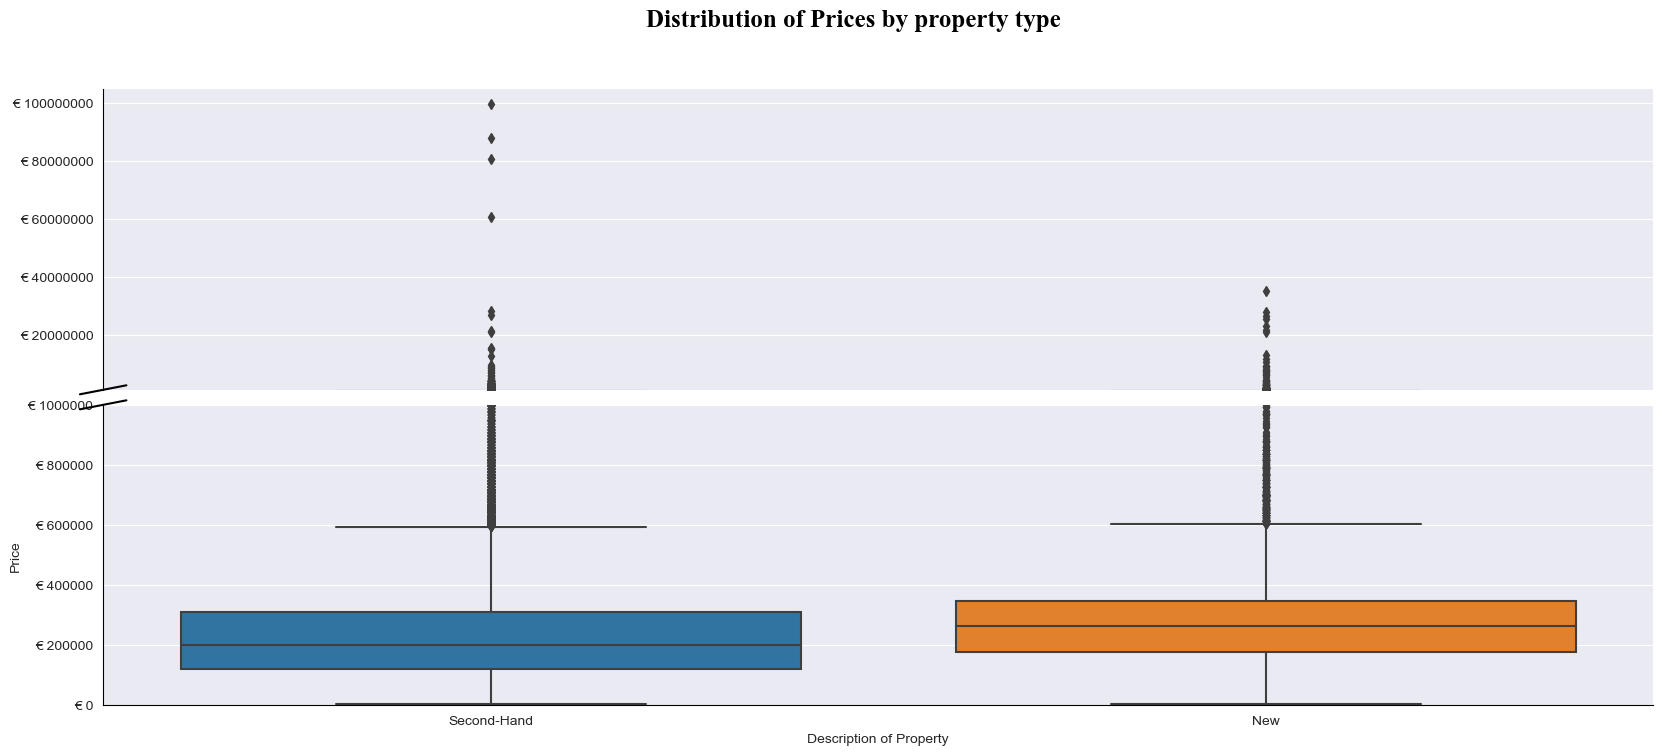

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

custom = {"axes.edgecolor": "black", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05},figsize=(20, 8))
f.suptitle('Distribution of Prices by property type',fontsize=18,color= "black", weight='bold',fontname="Times New Roman")
a = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_bottom)
b = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_top)
ax_top.set_ylim(bottom=1e6) 
ax_bottom.set_ylim(0,1e6)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 

ax_top.set(xlabel=None,ylabel=None)
b.ticklabel_format(style='plain', axis='y')
a.ticklabel_format(style='plain', axis='y')
ax_top.yaxis.set_major_formatter('€ {x:1.0f}')
ax_bottom.yaxis.set_major_formatter('€ {x:1.0f}')
plt.show()



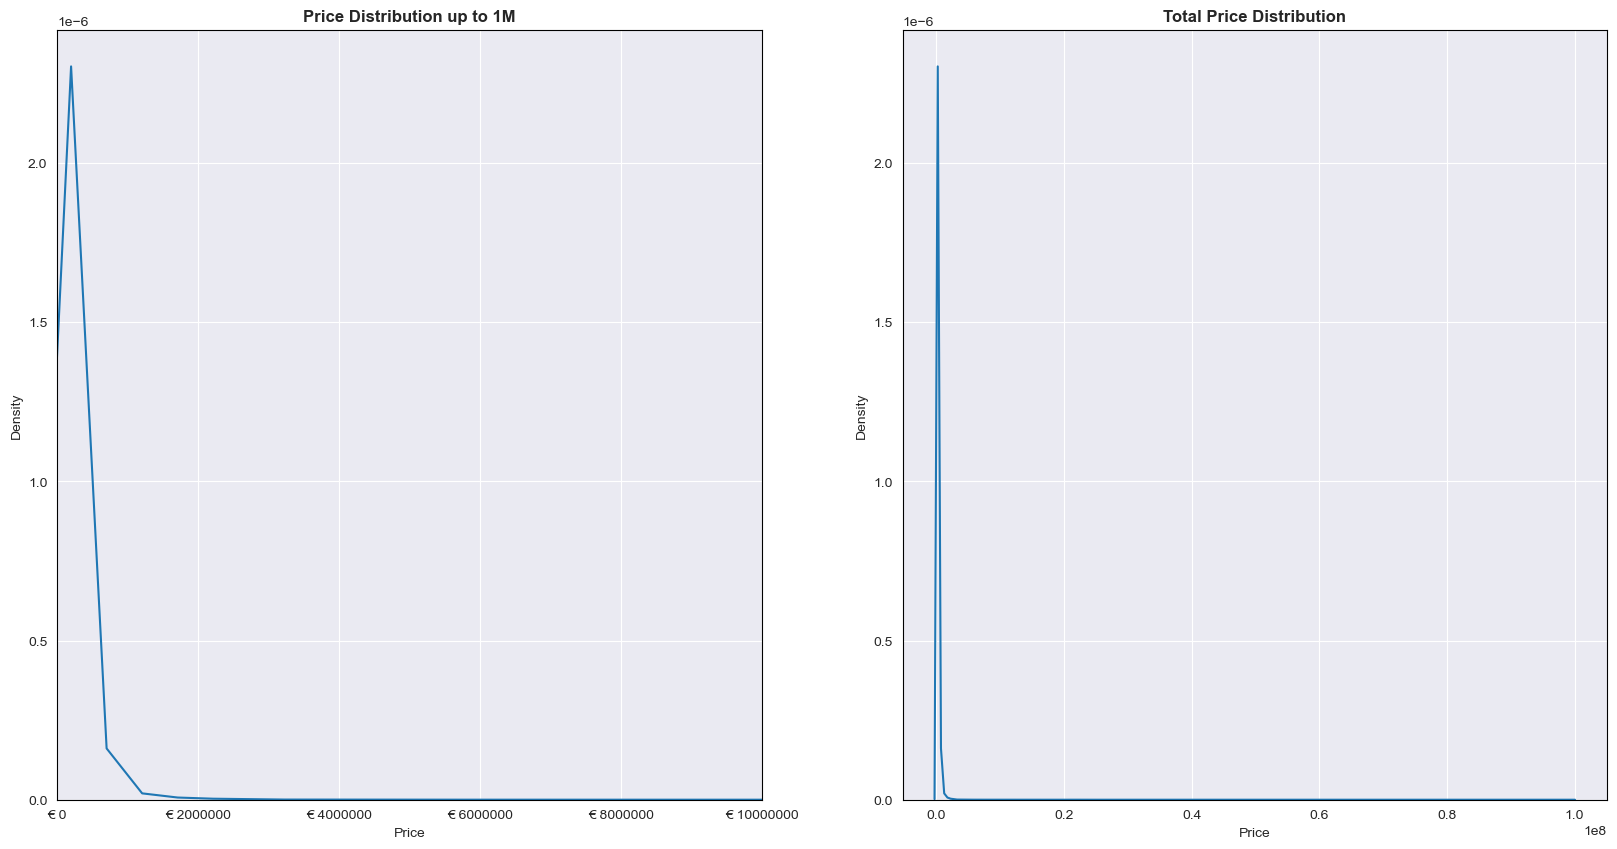

In [18]:
import seaborn as sns

f, axes = plt.subplots(ncols=2, nrows=1,figsize=(20, 10))

plott = sns.kdeplot(df['Price'], ax=axes[0])
plott.set_title('Price Distribution up to 1M', fontweight='bold')
plott.ticklabel_format(style='plain', axis='x')
plott.xaxis.set_major_formatter('€ {x:1.0f}')
plott.set_xlim([0, 10000000])

plott2 = sns.kdeplot(df['Price'], ax=axes[1])
plott2.set_title('Total Price Distribution', fontweight='bold')

plt.show()


In [19]:
from scipy.stats import shapiro,kstest,mannwhitneyu
for x in [df[df['Description of Property'] == 'Second-Hand'],df[df['Description of Property'] == 'New'] ]:
    stat, p = kstest(x['Price'],'norm')
    stat, p2 = shapiro(x['Price'])
    if p>0.05 or p2>0.05:
        print('accept H0')
    else:
        print('reject H0')

    

reject H0
reject H0


c:\Users\santi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
secon = df[df['Description of Property'] == 'Second-Hand']
new = df[df['Description of Property'] == 'New']

In [21]:
mannwhitneyu(secon['Price'],new['Price'])

MannwhitneyuResult(statistic=135847636.5, pvalue=1.5669899470283972e-197)

In [22]:
secon = []
new = []

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  50000 non-null  object 
 1   County                   50000 non-null  object 
 2   Price                    50000 non-null  float64
 3   Description of Property  50000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text column
bag_of_words = vectorizer.fit_transform(df['Address'])
type(bag_of_words)

# Convert the bag_of_words to a DataFrame
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the desired columns with the bag_of_words DataFrame
df = pd.concat([df, bag_of_words_df], axis=1)

In [25]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

scaler = RobustScaler()

# Select the column you want to scale
column_to_scale = df['Price']

# Reshape the column to match the expected input shape of the scaler
reshaped_column = column_to_scale.values.reshape(-1, 1)

# Apply the scaling transformation to the reshaped column
scaled_column = scaler.fit_transform(reshaped_column)

# Create a new column in the DataFrame with the scaled values
df['Price'] = scaled_column

In [26]:
# cleaning memory
reshaped_column = []
scaled_column = []
bag_of_words_df = []
x = []
column_to_scale = []
y = []

In [27]:
df.drop('Address', axis=1, inplace=True)

In [28]:
df = pd.get_dummies(df, columns=['County'])

In [29]:
df.head()

,Price,Description of Property,abbey,abbeyfeale,abbeylands,abbeyleix,abbeyside,abbot,abhainn,achill,...,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow
0,0.269231,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0.627190,New,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,-0.384615,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.073704,New,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.202564,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.shape

(50000, 1028)

X, Y PCA and train test split

In [31]:
X = df.drop('Description of Property', axis=1)

In [32]:
y = df['Description of Property']

In [33]:
#clean memory
df = []

In [34]:
X = X.dropna()

In [35]:
from sklearn.decomposition import PCA

for comp in range(X.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(X)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.80:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(X)
cluster_df = Final_PCA.transform(X)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))


Using 1 components, we can explain 0.9208041240464011% of the variability in the original data.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [37]:
Imp = {'value' : rf.feature_importances_, 'Feature': X.columns}
Imp = pd.DataFrame(Imp)
Imp.head()

,value,Feature
0,0.135356,Price
1,0.001854,abbey
2,0.000017,abbeyfeale
3,0.000087,abbeylands
4,0.000093,abbeyleix


0.3506425868610778


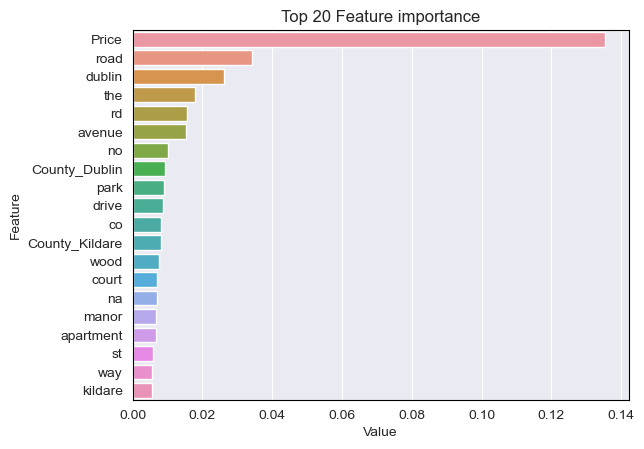

In [38]:
sorted_Imp = Imp.sort_values('value', ascending=False)

# Select the top 10 rows
top_20 = sorted_Imp.head(20)
print(top_20['value'].sum())
# Create the bar plot
sns.barplot(data=top_20, x='value', y='Feature')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature importance')
plt.show()

In [39]:
print(sorted_Imp)

        value       Feature
0    0.135356         Price
816  0.034256          road
356  0.026088        dublin
917  0.017934           the
798  0.015638            rd
..        ...           ...
521  0.000005     irishtown
517  0.000004     huntstown
890  0.000003  stoneybatter
926  0.000003          tone
253  0.000003   clanbrassil

[1027 rows x 2 columns]


In [40]:
for x in range(1000):
    if sorted_Imp['value'].head(x).sum()>.75:
        print(x)
        break


237


In [41]:
Feature = sorted_Imp['Feature'].head(237)

In [42]:
Feature

0            Price
816           road
356         dublin
917            the
798             rd
          ...     
544       kilkenny
941           unit
468     greystones
257    clarecastle
386    enniscorthy
Name: Feature, Length: 237, dtype: object

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, X.columns.isin(Feature)], y, test_size=0.25, random_state=42)
X_train.shape

(37500, 237)

In [44]:
from sklearn.metrics import confusion_matrix as confucio
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, roc_auc_score,roc_curve

In [45]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

<AxesSubplot:xlabel='Description of Property', ylabel='count'>

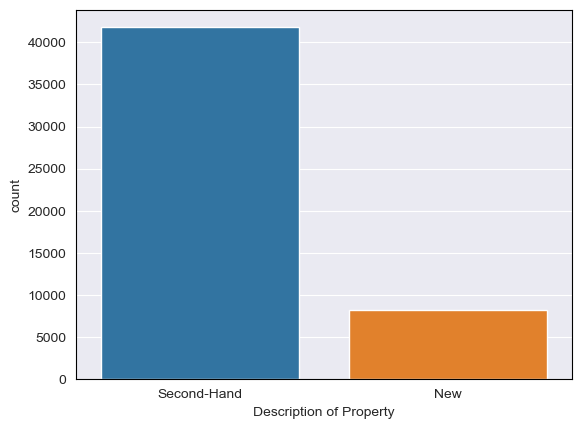

In [46]:
sns.countplot(x = y)

In [47]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= ros.fit_resample(X_train, y_train)

In [48]:
X_train_rus.shape

(12364, 237)

Optimal parameters:
 {'classification__C': 1, 'classification__kernel': 'rbf'}
Best mean cross-validated score:
 0.7744369665362588
Elapsed time: 695.85 seconds


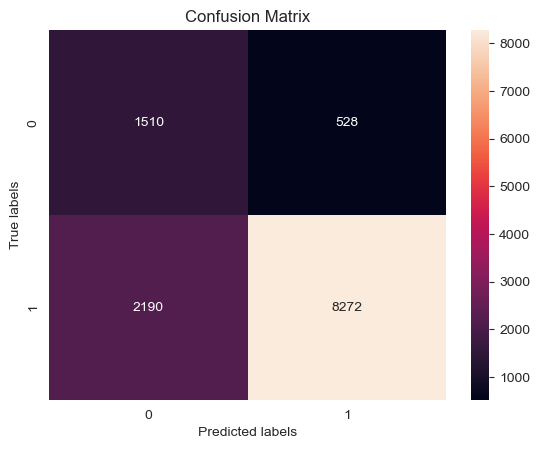

In [49]:
#svm
import time

start_time = time.time()
x = 'Svm'

model = Pipeline([('classification', SVC(random_state=1) )])

grid_params = {'classification__kernel': ['linear', 'poly', 'rbf'],
              'classification__C': [1,0.1,0.01]}

svm_clf = GridSearchCV(estimator=model, param_grid=grid_params, scoring='precision_weighted', cv=5,error_score='raise')

# fit the model
svm_clf.fit(X_train_rus,y_train_rus)

#best parameters,results from grid
svm_clf_best_parameters = svm_clf.best_params_
print("Optimal parameters:\n", svm_clf_best_parameters)
svm_clf_best_result = svm_clf.best_score_ 
print("Best mean cross-validated score:\n", svm_clf_best_result)

#metrics
y_pred= svm_clf.predict(X_test)
#confusion matrix
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Dublin', 'Not Dublin']); ax.yaxis.set_ticklabels(['Dublin', 'Not Dublin']);
#met(y_test,y_pred,x)

#checking time
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

In [52]:
print(precision_score(y_test, y_pred, average='macro')) 
print(recall_score(y_test, y_pred, average='macro'))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred , average = 'macro'))


0.674054054054054
0.7657967364107947
0.78256
0.6926044734929422
